<a href="https://colab.research.google.com/github/MatthewMoor/SOM-2.5PM/blob/master/SOMv6_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install somoclu


    100% |████████████████████████████████| 6.2MB 5.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import somoclu
%matplotlib inline

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dust_calculation.csv to dust_calculation.csv
User uploaded file "dust_calculation.csv" with length 152334 bytes


In [0]:
# Our data
dataset = pd.read_csv('dust_calculation.csv')
X = dataset.iloc[:, 1:]

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print(np.shape(X))
labels = range(X.shape[0])
print(labels)
print(X)

(2328, 7)
range(0, 2328)
[[0.2078461  0.72860636 0.66202532 ... 0.025      0.         0.28571429]
 [0.20181064 0.75061125 0.65253165 ... 0.01944444 0.         0.28571429]
 [0.19954734 0.76161369 0.64873418 ... 0.00277778 0.         0.2       ]
 ...
 [0.58091286 0.48533007 0.47468354 ... 0.62694444 0.         0.11428571]
 [0.58053565 0.48166259 0.47468354 ... 0.56944444 0.         0.11428571]
 [0.59939645 0.45110024 0.47468354 ... 0.60555556 0.         0.11428571]]


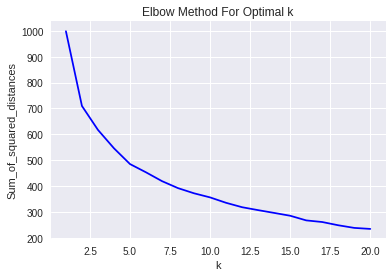

In [0]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k).fit(X)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
n_rows, n_columns = 15, 15
som = somoclu.Somoclu(n_columns, n_rows, data=X, maptype="toroid")
%time som.train(epochs=10, radius0=15, radiusN=1, scale0=0.1, scaleN=0.01)

CPU times: user 387 ms, sys: 1.49 ms, total: 389 ms
Wall time: 198 ms


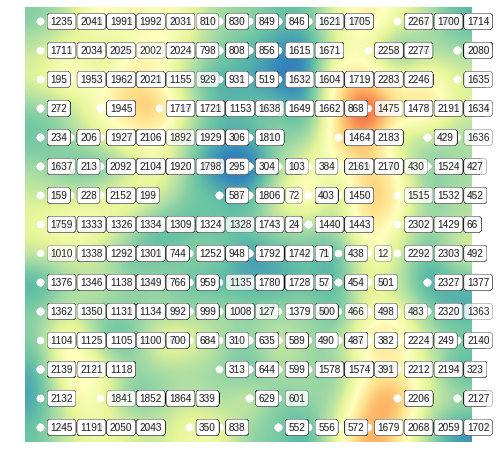

In [0]:
som.view_umatrix(bestmatches=True, labels=labels)
som_state = som.get_surface_state()

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [0]:
clusters = {}
for k in range(2328):  # The data instance you are interested in 
    cluster = str(som.clusters[som.bmus[k, 1], som.bmus[k, 0]])
    if not cluster in clusters.keys():
        clusters[cluster] = []
    clusters[cluster] += [k]
  
import json
print(json.dumps(clusters, sort_keys=True, indent=4))

{
    "0": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        10,
        11,
        12,
        13,
        15,
        16,
        19,
        20,
        21,
        22,
        24,
        33,
        35,
        36,
        38,
        41,
        51,
        52,
        53,
        55,
        56,
        57,
        58,
        59,
        60,
        61,
        62,
        63,
        67,
        68,
        69,
        70,
        71,
        72,
        356,
        357,
        363,
        364,
        365,
        366,
        367,
        368,
        369,
        370,
        371,
        372,
        373,
        374,
        375,
        376,
        377,
        378,
        379,
        381,
        382,
        383,
        384,
        398,
        400,
        401,
        402,
        403,
        436,
        437,
        438,
        441,
        442,
        447,
        448,
        449,
        450,

In [0]:
# probably working little bit wrong, maybe not
def cluster_data(number_cluster):
  pulled_data = []
  detailed_cluster = clusters[number_cluster]
  for i in detailed_cluster:
    pulled_data.append(X[i])
   
  return np.asarray(pulled_data)
  
test_data = cluster_data('0')
print(test_data)

[[0.2078461  0.72860636 0.66202532 ... 0.025      0.         0.28571429]
 [0.20181064 0.75061125 0.65253165 ... 0.01944444 0.         0.28571429]
 [0.19954734 0.76161369 0.64873418 ... 0.00277778 0.         0.2       ]
 ...
 [0.51339117 0.89853301 0.19810127 ... 0.18055556 0.33333333 0.11428571]
 [0.5303659  0.88141809 0.19050633 ... 0.18888889 0.33333333 0.11428571]
 [0.58958883 0.70171149 0.15886076 ... 0.27861111 0.33333333 0.11428571]]


In [0]:
n_rows, n_columns = 15, 15
som = somoclu.Somoclu(n_columns, n_rows, data=test_data, maptype="toroid")
%time som.train(epochs=10, radius0=15, radiusN=1, scale0=0.1, scaleN=0.01)

CPU times: user 46.4 ms, sys: 0 ns, total: 46.4 ms
Wall time: 23.3 ms


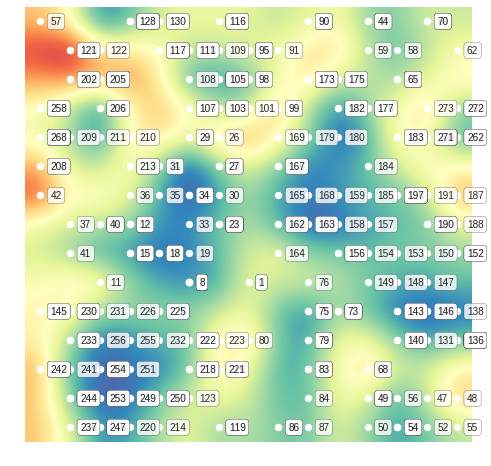

In [0]:
som.view_umatrix(bestmatches=True, labels=labels)
som_state = som.get_surface_state()

ValueError: ignored

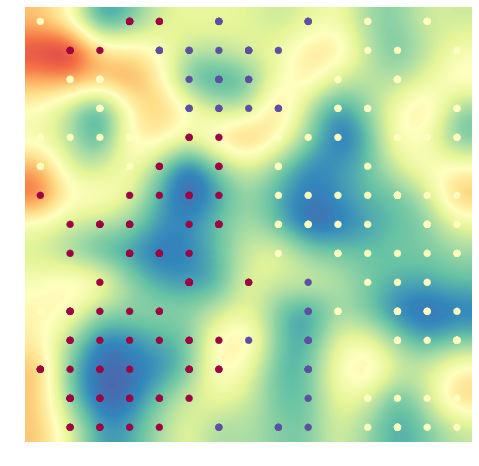

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:


from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 3)
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

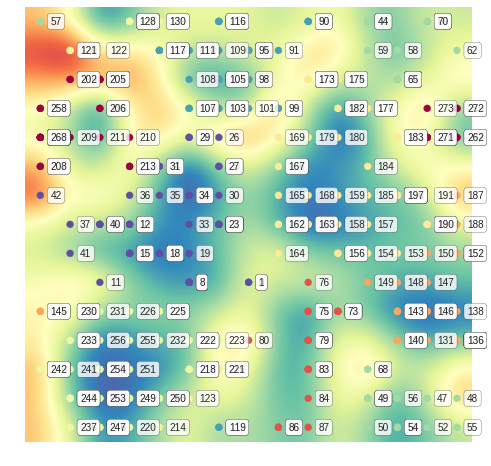

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_umatrix(bestmatches=True, labels=labels)